In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

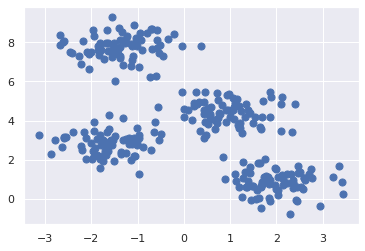

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [13]:
X[:5]

array([[ 0.83685684,  2.13635938],
       [-1.4136581 ,  7.40962324],
       [ 1.15521298,  5.09961887],
       [-1.01861632,  7.81491465],
       [ 1.27135141,  1.89254207]])

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [9]:
y_kmeans

array([2, 0, 3, 0, 2, 2, 1, 3, 0, 0, 1, 0, 3, 0, 2, 3, 3, 2, 1, 1, 2, 2,
       3, 1, 1, 3, 2, 3, 1, 3, 0, 0, 3, 0, 0, 0, 0, 0, 1, 2, 3, 1, 3, 3,
       1, 1, 0, 1, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 0, 3, 0, 1, 1, 1,
       0, 2, 0, 1, 3, 1, 0, 1, 1, 0, 1, 3, 2, 0, 2, 3, 2, 2, 0, 3, 2, 3,
       0, 0, 3, 2, 0, 1, 1, 3, 2, 2, 3, 1, 0, 2, 0, 2, 3, 2, 2, 3, 0, 3,
       1, 1, 2, 0, 2, 3, 0, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1,
       1, 2, 0, 1, 1, 0, 3, 0, 0, 1, 3, 1, 3, 1, 0, 3, 0, 0, 0, 3, 0, 3,
       2, 1, 0, 1, 2, 3, 0, 3, 3, 2, 3, 1, 1, 3, 2, 3, 3, 0, 2, 3, 1, 0,
       2, 2, 3, 1, 2, 3, 1, 1, 3, 3, 3, 3, 2, 0, 3, 1, 3, 3, 1, 1, 1, 3,
       1, 0, 3, 1, 2, 1, 3, 0, 1, 0, 3, 0, 3, 1, 3, 3, 0, 1, 1, 2, 2, 3,
       0, 2, 2, 1, 2, 1, 3, 0, 0, 3, 3, 0, 3, 2, 1, 3, 2, 1, 0, 1, 2, 3,
       2, 0, 0, 0, 0, 1, 1, 0, 3, 1, 2, 3, 1, 1, 1, 2, 2, 0, 3, 3, 1, 2,
       0, 1, 3, 0, 3, 2, 2, 1, 1, 3, 2, 2, 2, 3, 0, 0, 2, 2, 3, 2, 2, 2,
       0, 1, 0, 3, 2, 2, 0, 0, 0, 2, 2, 3, 0, 1], d

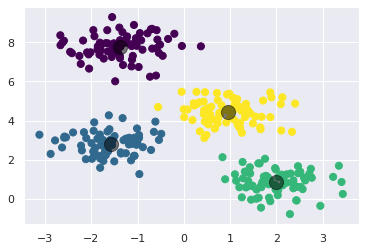

In [11]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    #1. Randomly choose cluster
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        #2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        #2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap="viridis")

# plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5)

In [12]:
y_kmeans

array([2, 0, 3, 0, 2, 2, 1, 3, 0, 0, 1, 0, 3, 0, 2, 3, 3, 2, 1, 1, 2, 2,
       3, 1, 1, 3, 2, 3, 1, 3, 0, 0, 3, 0, 0, 0, 0, 0, 1, 2, 3, 1, 3, 3,
       1, 1, 0, 1, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 0, 3, 0, 1, 1, 1,
       0, 2, 0, 1, 3, 1, 0, 1, 1, 0, 1, 3, 2, 0, 2, 3, 2, 2, 0, 3, 2, 3,
       0, 0, 3, 2, 0, 1, 1, 3, 2, 2, 3, 1, 0, 2, 0, 2, 3, 2, 2, 3, 0, 3,
       1, 1, 2, 0, 2, 3, 0, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1,
       1, 2, 0, 1, 1, 0, 3, 0, 0, 1, 3, 1, 3, 1, 0, 3, 0, 0, 0, 3, 0, 3,
       2, 1, 0, 1, 2, 3, 0, 3, 3, 2, 3, 1, 1, 3, 2, 3, 3, 0, 2, 3, 1, 0,
       2, 2, 3, 1, 2, 3, 1, 1, 3, 3, 3, 3, 2, 0, 3, 1, 3, 3, 1, 1, 1, 3,
       1, 0, 3, 1, 2, 1, 3, 0, 1, 0, 3, 0, 3, 1, 3, 3, 0, 1, 1, 2, 2, 3,
       0, 2, 2, 1, 2, 1, 3, 0, 0, 3, 3, 0, 3, 2, 1, 3, 2, 1, 0, 1, 2, 3,
       2, 0, 0, 0, 0, 1, 1, 0, 3, 1, 2, 3, 1, 1, 1, 2, 2, 0, 3, 3, 1, 2,
       0, 1, 3, 0, 3, 2, 2, 1, 1, 3, 2, 2, 2, 3, 0, 0, 2, 2, 3, 2, 2, 2,
       0, 1, 0, 3, 2, 2, 0, 0, 0, 2, 2, 3, 0, 1], d

In [1]:
from datetime import datetime
datetime_list = [
    datetime(2009, 10, 12, 10, 10),
    datetime(2010, 10, 12, 10, 10),
    datetime(2010, 10, 12, 10, 10),
    datetime(2015, 2, 12, 10, 10), # future
    datetime(2016, 2, 12, 10, 10), # future
]
oldest = min(datetime_list)
youngest = max(datetime_list)

In [2]:
oldest

datetime.datetime(2009, 10, 12, 10, 10)

In [3]:
youngest

datetime.datetime(2016, 2, 12, 10, 10)